In [119]:
import re
import datetime
import pandas as pd
import json
from osisoft.pidevclub.piwebapi.pi_web_api_client import PIWebApiClient
from pandasgui import show
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [15]:
# Cargar los archivos CSV en DataFrames
df1 = pd.read_csv('colapsos_verano1_features.csv')
df2 = pd.read_csv('colapsos_verano2_features.csv')
df3 = pd.read_csv('colapsos_verano3_features.csv')

# Unir los DataFrames por filas (concatenación vertical)
df_nea_hora = pd.concat([df1, df2, df3], ignore_index=True)

# Guardar el DataFrame combinado en un nuevo archivo CSV
df_nea_hora.to_csv('colpasos_veranos.csv', index=False)


In [150]:
df_nea = pd.read_csv('colpasos_veranos.csv')

C:\Users\CBureu\AppData\Local\Temp\ipykernel_26036\275017374.py:1: DtypeWarning:

Columns (36,37) have mixed types. Specify dtype option on import or set low_memory=False.



In [151]:
df_nea.set_index('Timestamp', inplace=True)

In [152]:
df_nea_hora = df_nea.copy()
df_nea_hora.index = pd.to_datetime(df_nea_hora.index).tz_convert('America/Argentina/Buenos_Aires').tz_localize(None)

df_nea_hora

,DEM_NEA/TOT_DEM_____P.AV,RESISTEN/TEMP.AV,RINCON/TEMP.AV,A.BROWN/132/ROCA1/I.AV,A.BROWN/132/ROCA1/P.AV,A.BROWN/132/ROCA1/Q.AV,A.BROWN/132/ROCA2/I.AV,A.BROWN/132/ROCA2/P.AV,A.BROWN/132/ROCA2/Q.AV,ALLEN/132/G.ROCA/I.AV,...,SMARTNEA/132/P.PLAZA/Q.AV,SMARTNEA/132/TRAFO1/I.AV,SMARTNEA/132/TRAFO1/P.AV,SMARTNEA/132/TRAFO1/Q.AV,SMARTNEA/132/TRAFO1/R.AV,SMARTNEA/132/TRAFO1/V.AV,SMARTNEA/132/TRAFO2/I.AV,SMARTNEA/132/TRAFO2/P.AV,SMARTNEA/132/TRAFO2/Q.AV,SMARTNEA/132/TRAFO2/V.AV
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00,1304.92969,19.435707,20.656444,163.051239,29.920727,-28.087967,191.371185,31.590675,-28.439537,195.500000,...,-0.000094,30.360000,6.482494,1.972933,5.0,131.280000,28.950000,6.5934,1.9602,131.867981
2021-12-01 00:01:00,1306.37781,19.435707,20.656444,168.368774,30.623863,-28.087967,214.454163,35.216217,-27.846264,194.799988,...,-0.000094,30.360000,6.482494,1.972933,5.0,131.280000,30.000000,6.4746,1.9602,131.867981
2021-12-01 00:02:00,1306.14832,19.582195,20.656444,163.292938,29.679024,-28.087967,194.553650,31.700539,-28.175861,194.900000,...,-0.000094,29.954998,6.482494,1.972933,5.0,131.280000,30.000000,6.4746,1.9602,132.131989
2021-12-01 00:03:00,1302.77124,19.582195,20.656444,162.688660,29.679024,-28.087967,194.231384,31.546730,-28.065994,194.900000,...,-0.000094,29.954998,6.482494,1.972933,5.0,131.280000,30.000000,6.4746,1.9602,132.131989
2021-12-01 00:04:00,1304.80200,19.582195,20.656444,162.044128,29.635078,-28.087967,189.316681,31.546730,-28.044022,195.199982,...,-0.000094,29.954998,6.482494,1.972933,5.0,131.280000,30.000000,6.4746,1.9602,132.131989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-07 23:56:00,2327.74658,28.176205,30.666515,316.736328,70.702590,-20.924774,327.492249,73.009766,-27.780346,102.300000,...,-0.000094,40.004997,7.722623,2.705737,20.0,121.440000,96.899994,18.9486,7.6626,122.099991
2024-02-07 23:57:00,2326.25500,28.176205,30.666515,316.011230,70.702590,-20.924774,299.776600,69.252380,-28.263752,102.300000,...,-0.000094,40.710000,7.722623,2.818476,20.0,121.679993,96.899994,18.9486,7.6626,122.099991
2024-02-07 23:58:00,2330.41968,28.176205,30.520023,316.011230,70.702590,-20.924774,290.994568,67.955980,-28.373615,102.800000,...,-0.000094,40.710000,7.722623,2.818476,20.0,121.679993,96.899994,18.9486,7.6626,122.099991


In [153]:
# Obtener las dimensiones del DataFrame
dimensiones = df_nea_hora.shape

# Imprimir el número de filas y columnas
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Número de filas: 358563
Número de columnas: 884


In [154]:
df_nea_hora.head()

,DEM_NEA/TOT_DEM_____P.AV,RESISTEN/TEMP.AV,RINCON/TEMP.AV,A.BROWN/132/ROCA1/I.AV,A.BROWN/132/ROCA1/P.AV,A.BROWN/132/ROCA1/Q.AV,A.BROWN/132/ROCA2/I.AV,A.BROWN/132/ROCA2/P.AV,A.BROWN/132/ROCA2/Q.AV,ALLEN/132/G.ROCA/I.AV,...,SMARTNEA/132/P.PLAZA/Q.AV,SMARTNEA/132/TRAFO1/I.AV,SMARTNEA/132/TRAFO1/P.AV,SMARTNEA/132/TRAFO1/Q.AV,SMARTNEA/132/TRAFO1/R.AV,SMARTNEA/132/TRAFO1/V.AV,SMARTNEA/132/TRAFO2/I.AV,SMARTNEA/132/TRAFO2/P.AV,SMARTNEA/132/TRAFO2/Q.AV,SMARTNEA/132/TRAFO2/V.AV
Timestamp,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00,1304.92969,19.435707,20.656444,163.051239,29.920727,-28.087967,191.371185,31.590675,-28.439537,195.500000,...,-0.000094,30.360000,6.482494,1.972933,5.0,131.28,28.95,6.5934,1.9602,131.867981
2021-12-01 00:01:00,1306.37781,19.435707,20.656444,168.368774,30.623863,-28.087967,214.454163,35.216217,-27.846264,194.799988,...,-0.000094,30.360000,6.482494,1.972933,5.0,131.28,30.00,6.4746,1.9602,131.867981
2021-12-01 00:02:00,1306.14832,19.582195,20.656444,163.292938,29.679024,-28.087967,194.553650,31.700539,-28.175861,194.900000,...,-0.000094,29.954998,6.482494,1.972933,5.0,131.28,30.00,6.4746,1.9602,132.131989
2021-12-01 00:03:00,1302.77124,19.582195,20.656444,162.688660,29.679024,-28.087967,194.231384,31.546730,-28.065994,194.900000,...,-0.000094,29.954998,6.482494,1.972933,5.0,131.28,30.00,6.4746,1.9602,132.131989
2021-12-01 00:04:00,1304.80200,19.582195,20.656444,162.044128,29.635078,-28.087967,189.316681,31.546730,-28.044022,195.199982,...,-0.000094,29.954998,6.482494,1.972933,5.0,131.28,30.00,6.4746,1.9602,132.131989


In [155]:
import pandas as pd

# Crear la columna 'Colapso' inicializada con ceros
df_nea_hora['Colapso'] = 0

# Calcular la diferencia entre el valor actual y el anterior
diferencia = df_nea_hora['DEM_NEA/TOT_DEM_____P.AV'].diff().abs()

# Identificar instantes donde la diferencia es mayor a 500 y marcar como 100
df_nea_hora.loc[diferencia > 500, 'Colapso'] = 100

# Encontrar índices donde 'Colapso' es igual a 100
indices_colapso_100 = df_nea_hora[df_nea_hora['Colapso'] == 100].index

# Iterar sobre los índices y marcar 1 media hora antes y 2 para la media hora anterior
for idx in indices_colapso_100:
    df_nea_hora.loc[idx - pd.Timedelta(minutes=30):idx - pd.Timedelta(minutes=1), 'Colapso'] = 1
    df_nea_hora.loc[idx - pd.Timedelta(minutes=60):idx - pd.Timedelta(minutes=31), 'Colapso'] = 2
    df_nea_hora.loc[idx - pd.Timedelta(minutes=90):idx - pd.Timedelta(minutes=61), 'Colapso'] = 3

df_nea_hora_colapsos = df_nea_hora[df_nea_hora['Colapso'] != 0]


In [156]:
# Obtener las dimensiones del DataFrame
dimensiones = df_nea_hora_colapsos.shape

# Imprimir el número de filas y columnas
print(f"Número de filas: {dimensiones[0]}")
print(f"Número de columnas: {dimensiones[1]}")

Número de filas: 4898
Número de columnas: 885


In [157]:
df_nea_hora_colapsos.to_csv('colapso.csv', index=True)

In [158]:
df_nea_hora_colapsos.dtypes

DEM_NEA/TOT_DEM_____P.AV    float64
RESISTEN/TEMP.AV            float64
RINCON/TEMP.AV              float64
A.BROWN/132/ROCA1/I.AV      float64
A.BROWN/132/ROCA1/P.AV      float64
                             ...   
SMARTNEA/132/TRAFO2/I.AV    float64
SMARTNEA/132/TRAFO2/P.AV    float64
SMARTNEA/132/TRAFO2/Q.AV    float64
SMARTNEA/132/TRAFO2/V.AV    float64
Colapso                       int64
Length: 885, dtype: object

In [63]:
# Seleccionar columnas que no son de tipo flotante
columnas_no_flotantes = df_nea_hora_colapsos.select_dtypes(exclude='float64').columns

# Imprimir las columnas que no son de tipo flotante
print("Columnas no flotantes:", columnas_no_flotantes)

Columnas no flotantes: Index(['BARRANQU/13/TRAFO6/P.AV', 'BARRANQU/13/TRAFO6/Q.AV', 'Colapso'], dtype='object')


In [159]:
# Eliminar filas con valores no numéricos
df_nea_hora_colapsos = df_nea_hora_colapsos.apply(pd.to_numeric, errors='coerce').dropna()


In [74]:
df_corr = df_nea_hora_colapsos.corr()
show(df_corr)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
C:\Users\CBureu\AppData\Local\Temp\ipykernel_26036\3702370511.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\CBureu\AppData\Local\Temp\ipykernel_26036\3702370511.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\CBureu\AppData\Local\Temp\ipykernel_26036\3702370511.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\CBureu\AppData\Local\Temp\ipykerne

In [76]:
umbral_correlacion = 0.98

pares_alta_correlacion = []

for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if abs(df_corr.iloc[i, j]) > umbral_correlacion:
            pares_alta_correlacion.append((df_corr.columns[i], df_corr.columns[j]))

for par in pares_alta_correlacion:
    print(f"Correlación entre {par[0]} y {par[1]}: {df_corr.loc[par[0], par[1]]}")


Correlación entre RINCON/TEMP.AV y RINCON/TEMP.AV.1: 1.0
Correlación entre BARRANQU/33/BARRA1/V.AV y BARRANQU/33/BARRA2/V.AV: 0.9913863893433806
Correlación entre BARRANQU/33/RESIST1/I.AV y BARRANQU/33/RESIST2/I.AV: 0.9930414211326647
Correlación entre BARRANQU/132/CD6/I.AV y BARRANQU/132/CD6/P.AV: 0.9889976579375891
Correlación entre BARRANQU/132/RESIST1/I.AV y BARRANQU/132/RESIST1/P.AV: -0.9927920888746409
Correlación entre BARRANQU/132/RESIST2/I.AV y BARRANQU/132/RESIST2/P.AV: -0.9831321154832107
Correlación entre BARRANQU/132/TRAFO4/P.AV y BARRANQU/132/TRAFO4/Q.AV: -0.9855656547583415
Correlación entre BASAVIL/132/NOGOYA/Q.AV y NOGOYA/132/BASAVIL/Q.AV: -0.9834293734019559
Correlación entre C.CUATIA/13/TRAFO1/P.AV y C.CUATIA/132/TRAFO1/I.AV: -0.988826590083083
Correlación entre CALCHINE/132/RINCONL/I.AV y PARANA/132/RINCONL/I.AV: 0.9847343692358931
Correlación entre CALCHINE/132/RINCONL/I.AV y PARANA/132/RINCONL/P.AV: -0.9897356301016766
Correlación entre CHACO/132/CHARATA/I.AV y CH

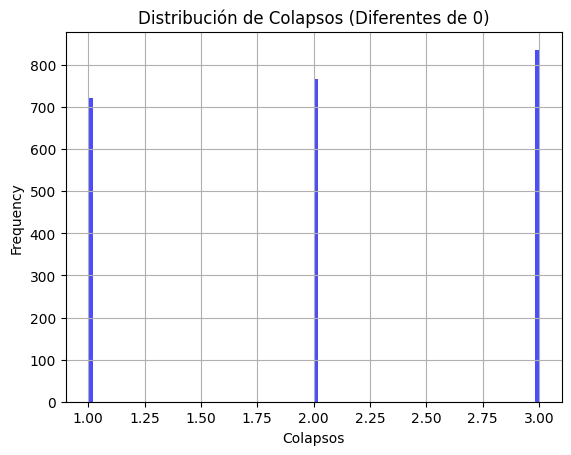

In [160]:
colapso_values = df_nea_hora_colapsos['Colapso'][df_nea_hora_colapsos['Colapso'] != 100].dropna()

if not colapso_values.empty:
    plt.hist(colapso_values, bins=100, color='blue', alpha=0.7)
    plt.title('Distribución de Colapsos (Diferentes de 0)')
    plt.xlabel('Colapsos')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [161]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')

    # qqplot
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')

    # boxplot
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)

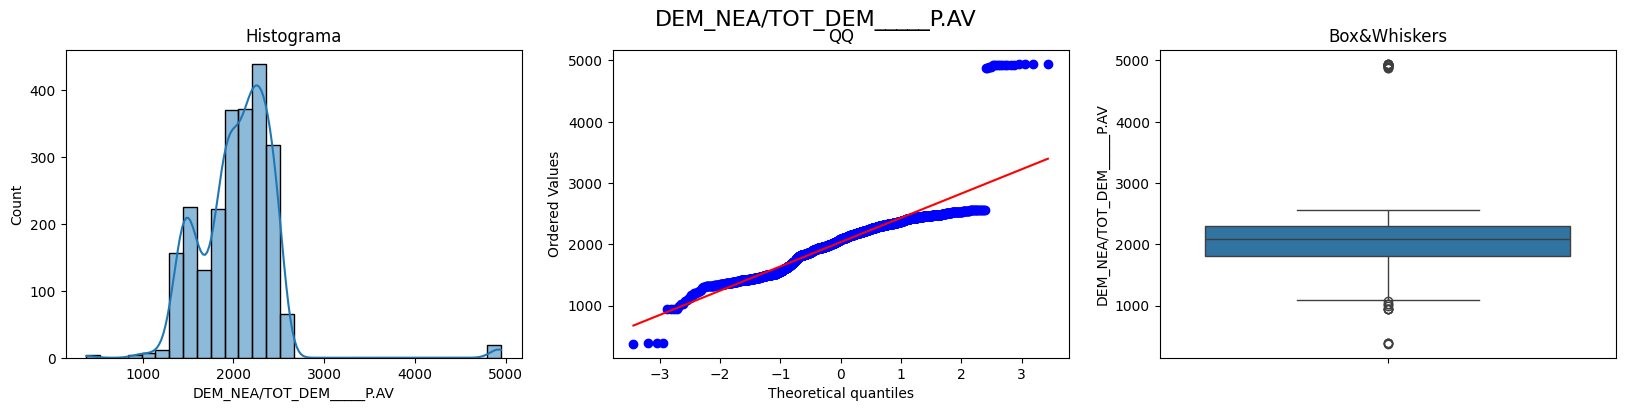

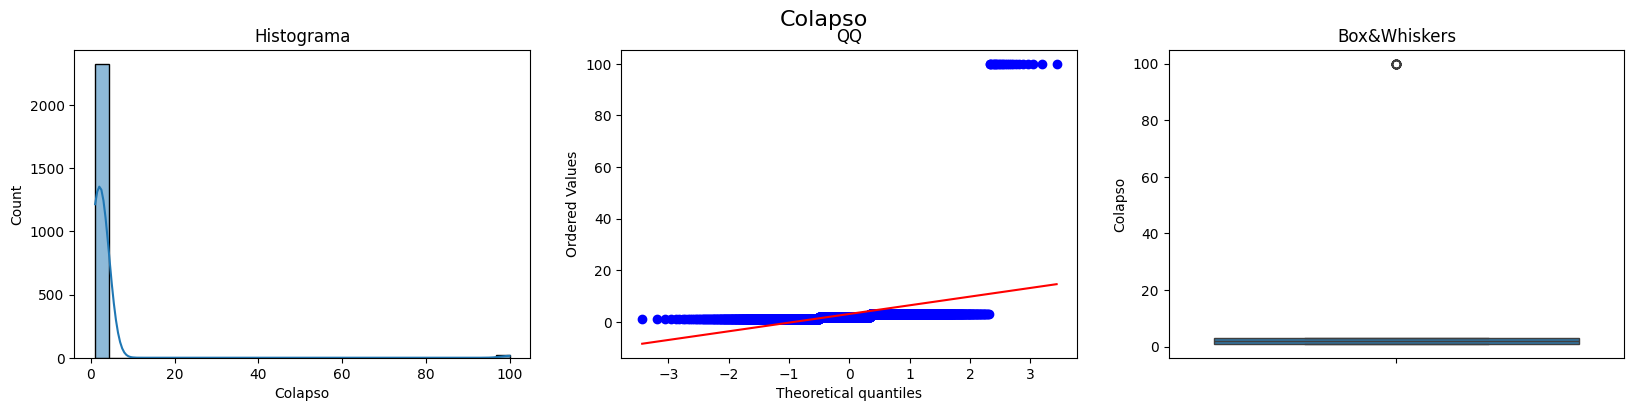

In [162]:
norm_col = [
    'DEM_NEA/TOT_DEM_____P.AV',
    'Colapso'
]

for col in norm_col:
    outlier_diagnostic_plots(df_nea_hora_colapsos, col)

In [163]:
# Asegurarse de que la columna de índices sea de tipo datetime
df_nea_hora_colapsos.index = pd.to_datetime(df_nea_hora_colapsos.index)

# Filtrar los instantes donde 'Colapso' es igual a 2
colapso_indices = df_nea_hora_colapsos[df_nea_hora_colapsos['Colapso'] == 100].index

# Crear gráficas individuales para cada colapso
for colapso_indice in colapso_indices:
    # Seleccionar datos para la gráfica (30 minutos antes y después del colapso)
    inicio = colapso_indice - pd.Timedelta(minutes=30)
    fin = colapso_indice + pd.Timedelta(minutes=30)
    df_grafica = df_nea_hora.loc[inicio:fin]

    # Crear gráfica interactiva con Plotly Express
    fig = px.line(df_grafica, x=df_grafica.index, y='DEM_NEA/TOT_DEM_____P.AV', labels={'DEM_NEA/TOT_DEM_____P.AV': 'DEM_NEA/TOT_DEM_____P.AV'})
    fig.update_layout(
        title=f'Gráfica para Colapso en {colapso_indice}',
        xaxis_title='Tiempo',
        yaxis_title='DEM_NEA/TOT_DEM_____P.AV'
    )

    # Formatear la marca de tiempo para eliminar caracteres no permitidos
    colapso_indice_str = colapso_indice.strftime('%Y%m%d_%H%M%S')

    # Guardar la gráfica en un archivo HTML
    fig.write_html(f"C:\\Users\\CBureu\\Documents\\IOP\\NEA\\Graficas\\Colapsos\\grafica_colapso_{colapso_indice_str}.html")


In [164]:
import plotly.express as px
import plotly.graph_objects as go

# Definir las columnas de interés y sus respectivos prefijos
columnas_prefijos = {
    '/500/': 'potencias_500',
    '/132/': 'potencias_132',
    '/33/': 'potencias_33',
    '/13/': 'potencias_13'
}

# columnas_prefijos = {
#     '/500/': 'tensiones_500',
#     '/132/': 'tensiones_132',
#     '/33/': 'tensiones_33',
#     '/13/': 'tensiones_13'
# }

# Filtrar los instantes donde 'Colapso' es igual a 2
colapso_indices = df_nea_hora_colapsos[df_nea_hora_colapsos['Colapso'] == 100].index

# Recorrer cada conjunto de columnas por prefijo
for prefijo, descripcion in columnas_prefijos.items():
    # Definir las columnas que cumplen con las condiciones
    columnas_a_graficar = [col for col in df_nea_hora.columns if prefijo in col and col.endswith('/P.AV')]
    
    # Crear gráficas individuales para cada colapso
    for colapso_indice in colapso_indices:
        # Seleccionar datos para la gráfica (30 minutos antes y después del colapso)
        inicio = colapso_indice - pd.Timedelta(minutes=60)
        fin = colapso_indice + pd.Timedelta(minutes=60)
        df_grafica = df_nea_hora.loc[inicio:fin]

        # Filtrar columnas que no son todas cero en el rango seleccionado
        columnas_validas = [col for col in columnas_a_graficar if df_grafica[col].any()]

        # Verificar si hay al menos una columna válida antes de crear la gráfica
        if columnas_validas:
            # Crear gráfica interactiva con Plotly Express
            fig = px.line(df_grafica, x=df_grafica.index, y=columnas_validas)
            fig.update_layout(
                title=f'Gráfica para {descripcion} en Colapso {colapso_indice}',
                xaxis_title='Tiempo',
                yaxis_title=', '.join(columnas_validas)
            )

            # Agregar línea vertical en el instante del colapso
            fig.add_shape(
                go.layout.Shape(
                    type="line",
                    x0=colapso_indice,
                    x1=colapso_indice,
                    y0=min(df_grafica[columnas_validas].min()),
                    y1=max(df_grafica[columnas_validas].max()),
                    line=dict(color="black", width=2, dash='dot')
                )
            )

            # Formatear la marca de tiempo para eliminar caracteres no permitidos
            colapso_indice_str = colapso_indice.strftime('%Y%m%d_%H%M%S')

            # Guardar la gráfica en un archivo HTML
            fig.write_html(f"C:\\Users\\CBureu\\Documents\\IOP\\NEA\\Graficas\\Potencias\\{prefijo}\\{colapso_indice_str}.html")
            # fig.write_html(f"C:\\Users\\CBureu\\Documents\\IOP\\NEA\\Graficas\\Tensiones\\{prefijo}\\{colapso_indice_str}.html")        

In [165]:
# Obtener la lista de columnas que representan P y Q
columnas_P = [col for col in df_nea_hora_colapsos.columns if col.endswith('/P.AV')]
columnas_Q = [col for col in df_nea_hora_colapsos.columns if col.endswith('/Q.AV')]
columnas_V = [col for col in df_nea_hora_colapsos.columns if col.endswith('/V.AV')]

# Crear DataFrame separado para P y Q
df_P = df_nea_hora_colapsos[columnas_P]
df_Q = df_nea_hora_colapsos[columnas_Q]
df_V = df_nea_hora_colapsos[columnas_V]
df_QP_ratios = pd.DataFrame()

# Dividir Q/P para columnas con el mismo comienzo
for col_Q in columnas_Q:
    # Obtener el comienzo del nombre del tag (sin la parte '/Q.AV')
    tag_inicio = col_Q.split('/Q.AV')[0]

    # Encontrar la columna P correspondiente
    col_P = next((p for p in columnas_P if p.startswith(tag_inicio)), None)

    # Verificar si se encontró una columna P correspondiente
    if col_P:
        # Crear una nueva columna para la división Q/P
        col_division = f'{tag_inicio}/QP_RATIO'
        df_QP_ratios[col_division] = df_Q[col_Q] / df_P[col_P]

# Fusionar df_nea_hora con df_QP_ratios en función del índice
df_nea_hora_con_ratios = pd.merge(df_nea_hora_colapsos, df_QP_ratios, left_index=True, right_index=True)

# Si deseas guardar el resultado en un nuevo archivo CSV
df_nea_hora_con_ratios.to_csv('df_nea_hora_con_ratios.csv', index=True)

C:\Users\CBureu\AppData\Local\Temp\ipykernel_26036\2297761010.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\CBureu\AppData\Local\Temp\ipykernel_26036\2297761010.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\CBureu\AppData\Local\Temp\ipykernel_26036\2297761010.py:24: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

In [116]:
# Asegurarse de que la columna de índices sea de tipo datetime
df_nea_hora_colapsos.index = pd.to_datetime(df_nea_hora_colapsos.index)

# Filtrar los instantes donde 'Colapso' es igual a 2
colapso_indices = df_nea_hora_colapsos[df_nea_hora_colapsos['Colapso'] == 100].index

# Crear gráficas individuales para cada colapso
for colapso_indice in colapso_indices:
    # Seleccionar datos para la gráfica (30 minutos antes y después del colapso)
    inicio = colapso_indice - pd.Timedelta(minutes=30)
    fin = colapso_indice + pd.Timedelta(minutes=30)
    df_grafica = df_QP_ratios.loc[inicio:fin]

    # Crear gráfica interactiva con Plotly Express
    fig = px.line(df_grafica, x=df_grafica.index, y=df_grafica.columns, labels={'value': 'QP Ratio'})
    fig.update_layout(
        title=f'Gráfica para Colapso en {colapso_indice}',
        xaxis_title='Tiempo',
        yaxis_title='QP Ratio'
    )

    # Formatear la marca de tiempo para eliminar caracteres no permitidos
    colapso_indice_str = colapso_indice.strftime('%Y%m%d_%H%M%S')

    # Guardar la gráfica en un archivo HTML
    fig.write_html(f"C:\\Users\\CBureu\\Documents\\IOP\\NEA\\Graficas\\Colapsos\\grafica_colapso_{colapso_indice_str}_QP_RATIO.html")
